In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [2]:
b=0.01
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe':1000}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_WA = {'func': curly_GBWA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_WA = {**pulse_params, **harm_params, **sol_params_WA}


In [3]:
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

In [4]:
bsamples = 1000
brange = (1e-2, 1e-1) # confocal perameter [m]
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

B_scan = scan_builder(single_func, params_WA, [bscan])

In [5]:
scanned_WA = B_scan(params=params_WA)

0.01
0.010090090090090091
0.01018018018018018
0.010270270270270271
0.01036036036036036
0.010450450450450451
0.01054054054054054
0.010630630630630631
0.01072072072072072
0.010810810810810811
0.0109009009009009
0.010990990990990991
0.011081081081081082
0.011171171171171172
0.01126126126126126
0.011351351351351352
0.011441441441441443
0.011531531531531532
0.011621621621621623
0.011711711711711712
0.011801801801801803
0.011891891891891892
0.011981981981981983
0.012072072072072074
0.012162162162162163
0.012252252252252252
0.012342342342342343
0.012432432432432434
0.012522522522522523
0.012612612612612614
0.012702702702702703
0.012792792792792794
0.012882882882882883
0.012972972972972974
0.013063063063063063
0.013153153153153154
0.013243243243243243
0.013333333333333334
0.013423423423423425
0.013513513513513514
0.013603603603603603
0.013693693693693694
0.013783783783783785
0.013873873873873874
0.013963963963963964
0.014054054054054056
0.014144144144144145
0.014234234234234235
0.0143243243243

Text(0.5, 1.0, 'Optimal b = 0.4 [m]')

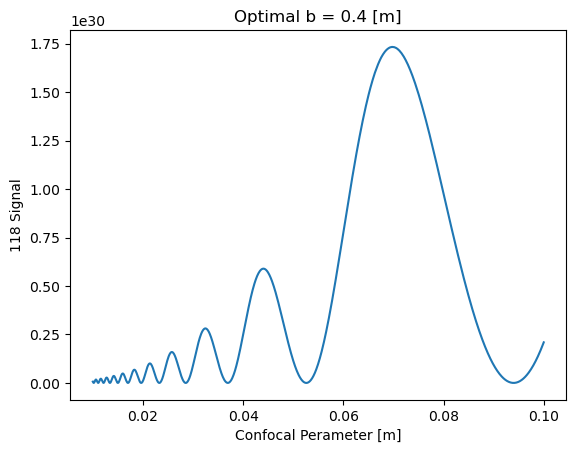

In [6]:
plt.plot(scanned_WA.b.data,scanned_WA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.4 [m]')


In [7]:
opt_b_index = np.where(scanned_WA.data[:,0] == max(scanned_WA.data[:,0]))[0][0]
print('optimal b value: ',scanned_WA.b.data[opt_b_index])


optimal b value:  0.06972972972972974


In [8]:
b=0
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe':1000}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_NA = {'func': curly_GBNA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_NA = {**pulse_params, **harm_params, **sol_params_NA}

bsamples = 1000
brange = (1e-2, 1e-1) # confocal perameter [m]
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

B_scan_NA = scan_builder(single_func, params_NA, [bscan])

In [9]:
scanned_NA = B_scan_NA(params=params_NA)

0.01
0.010090090090090091
0.01018018018018018
0.010270270270270271
0.01036036036036036
0.010450450450450451
0.01054054054054054
0.010630630630630631
0.01072072072072072
0.010810810810810811
0.0109009009009009
0.010990990990990991
0.011081081081081082
0.011171171171171172
0.01126126126126126
0.011351351351351352
0.011441441441441443
0.011531531531531532
0.011621621621621623
0.011711711711711712
0.011801801801801803
0.011891891891891892
0.011981981981981983
0.012072072072072074
0.012162162162162163
0.012252252252252252
0.012342342342342343
0.012432432432432434
0.012522522522522523
0.012612612612612614
0.012702702702702703
0.012792792792792794
0.012882882882882883
0.012972972972972974
0.013063063063063063
0.013153153153153154
0.013243243243243243
0.013333333333333334
0.013423423423423425
0.013513513513513514
0.013603603603603603
0.013693693693693694
0.013783783783783785
0.013873873873873874
0.013963963963963964
0.014054054054054056
0.014144144144144145
0.014234234234234235
0.0143243243243

Text(0.5, 1.0, 'Optimal b = 0.136 [m]')

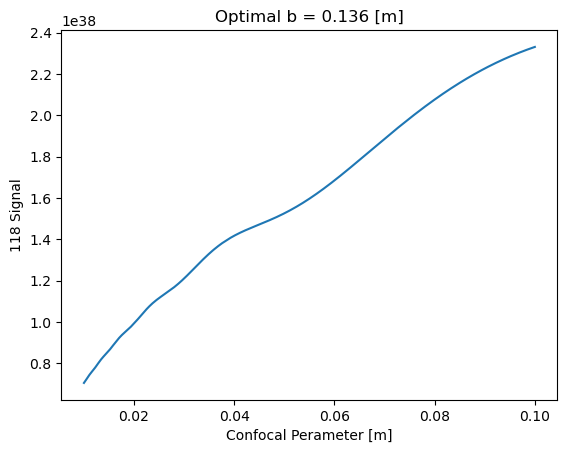

In [23]:
plt.plot(scanned_NA.b.data,scanned_NA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.136 [m]')



In [11]:
opt_b_index_NA = np.where(scanned_NA.data[:,0] == max(scanned_NA.data[:,0]))[0][0]
print(scanned_NA.b.data[opt_b_index_NA])

0.1


In [12]:
omega_initial = 0.5e-2
b_final = 0.4

b_to_f(omega_initial,0.002260011735083854)

0.4999999999990347

In [35]:
k_355 = 2*np.pi/lambda_355
b_yag = k_355*omega_initial**2
print(b_yag)

442.47783853377365


In [37]:
(2*omega_initial/b_yag)**2

5.107600867410249e-10

In [65]:
zR_yag = b_yag/2
q_yag = complex(0,zR_yag)
params = {'lambda':lambda_355}
q_lens1=thin_lens(q_yag,100e-2)
print('AFTER THIN LENS:')
q_to_params(q_lens1,params)
q_focus1=free_space(q_lens1,0.9999795700139232)
print('AT FOCUS:')
q_to_params(q_focus1,params)


AFTER THIN LENS:
positon relative to focus:  -0.9999795700139232 [m]
beam spot size:  0.005 [m]
AT FOCUS:
positon relative to focus:  0.0 [m]
beam spot size:  2.2599771059007745e-05 [m]


In [68]:
omega0_lens1 = 2.2599771059007745e-05

b_lens1 = k_355*omega0_lens1**2
print(b_lens1)

0.009039816080529837


In [75]:
b_to_f(2.2599771059007745e-05,0.4)*100

1.1227886160586296

In [45]:
b_to_f(0.5e-2,0.4)

6.648898856980159

In [78]:
f_to_b(2.2599771059007745e-05,1.2e-2)

0.5128420274853751